In [149]:
## Project_part3

In [150]:
## Library upload
import  pandas as pd
import numpy as np



## Data upload 
Air_Quality = pd.read_csv('D:\Data_A\Project\Real_Combine.csv')



## Data cleaning 
Air_Quality.isnull().sum()
Air_Quality[Air_Quality['PM 2.5'].isnull()]



## Data update
Air_Quality_Updated = Air_Quality.interpolate()
# display(Air_Quality_Updated)



## Data pattern
print(Air_Quality_Updated.head())
print(Air_Quality_Updated.tail())


## Statistical analysis of data 
print(Air_Quality_Updated.describe())




## Data visualization 
# from matplotlib import pyplot as plt 
# import seaborn as sns
# sns.heatmap(Air_Quality_Updated.isnull(), yticklabels=False)




## Pairplot
# sns.pairplot(Air_Quality_Updated)
# plt.savefig("pairplot.png")



## Data outlayers using boxplot
# import matplotlib.pyplot as plt

# a4_dims=(11.7, 8.27)
# flg, ax= plt.subplots(figsize=a4_dims)
# g=sns.boxplot(data=Air_Quality_Updated, linewidth=2.5, ax=ax)
# g.set_yscale("log")
# plt.savefig("boxplot.png")
# plt.show()




## Data normalization 
target = Air_Quality_Updated['PM 2.5']
Air_Quality_Updated = Air_Quality_Updated.iloc[:,:-1].apply(lambda x: (x-x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))
Air_Quality_Updated['PM 2.5'] = target



## Variance or co-variance
#print(Air_Quality_Updated.corr())




new_data = pd.DataFrame(data = Air_Quality_Updated)
print(new_data)

      T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333
                 T           TM           Tm          SLP            H  \
count  1093.000000  1093.000000  1093.000000  1093.000000  1093.000000   
mean     26.009241    32.482251    19.460201  1008.081885    62.918573   
std       7.2374

In [151]:
### feature reduction by PCA technique


## separate dataset into attributes and target
cols = ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'] 
x = new_data.loc[:, cols].values
y = new_data.loc[:, ['PM 2.5']].values


from sklearn.decomposition import PCA    
for i in range(2,8):
    pca = PCA(n_components = i)
    pca_components = pca.fit_transform(x)
    print('For', i, 'components', 'total variance: ', sum(pca.explained_variance_ratio_))
    #pca_components = pca.fit_transform(x)
    
    
### we can select 6 components
pca = PCA(n_components = 6)
pca_components = pca.fit_transform(x)
pca_new_data = pd.DataFrame(data = pca_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_new_data = pd.concat([pca_new_data, new_data[['PM 2.5']]], axis = 1)


For 2 components total variance:  0.8338691291525626
For 3 components total variance:  0.9267355190616648
For 4 components total variance:  0.9602392555156882
For 5 components total variance:  0.9770564443524145
For 6 components total variance:  0.9927145395600616
For 7 components total variance:  0.9982415241024583


In [152]:
## Decision tree (1st model)

In [153]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_new_data.iloc[:,:-1], pca_new_data.iloc[:,-1], random_state=10)



## Training the model
from sklearn.tree import DecisionTreeRegressor
reg_decision_model = DecisionTreeRegressor(max_depth=6)
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)
predicted = reg_decision_model.predict(X_test)
expected  = y_test



## Check for overfit
print("Training set score: ", reg_decision_model.score(X_train,y_train))
print("Testing set score: ", reg_decision_model.score(X_test,y_test))



## Decision Tree Model Evaluation
from sklearn import metrics
print("Mean Squared Error: ", metrics.mean_squared_error(expected, predicted))
print("Mean Absloute Error: ", metrics.mean_absolute_error(expected,predicted))
print("R2 Score: ", metrics.r2_score(expected,predicted))


Training set score:  0.8109409420137816
Testing set score:  0.6875906168565988
Mean Squared Error:  2579.668005570406
Mean Absloute Error:  35.106077915066486
R2 Score:  0.6875906168565988


In [154]:
## Analysis using KNN model  

In [155]:
## Change the target column to categorical so that the problem becomes classification problem
pca_new_data['target'] = pd.qcut(pca_new_data['PM 2.5'], 3, labels=list('ABC'))
print(pca_new_data.head())


## Dropping the old target column: PM 2.5 
new_data = pca_new_data.drop(labels = ['PM 2.5'], axis  = 1)
print(pca_new_data.head())

        PC1       PC2       PC3       PC4       PC5       PC6      PM 2.5  \
0  1.077201 -0.158603  0.223166 -0.044292 -0.155649 -0.041812  219.720833   
1  1.032549 -0.076819  0.172960 -0.049750 -0.132246 -0.015550  182.187500   
2  1.067619  0.003353  0.141606 -0.061500 -0.154016 -0.020869  154.037500   
3  0.913080  0.202194  0.225245 -0.084376 -0.128428  0.028105  223.208333   
4  0.697821  0.308357  0.139972 -0.055884 -0.122214  0.045140  200.645833   

  target  
0      C  
1      C  
2      C  
3      C  
4      C  
        PC1       PC2       PC3       PC4       PC5       PC6      PM 2.5  \
0  1.077201 -0.158603  0.223166 -0.044292 -0.155649 -0.041812  219.720833   
1  1.032549 -0.076819  0.172960 -0.049750 -0.132246 -0.015550  182.187500   
2  1.067619  0.003353  0.141606 -0.061500 -0.154016 -0.020869  154.037500   
3  0.913080  0.202194  0.225245 -0.084376 -0.128428  0.028105  223.208333   
4  0.697821  0.308357  0.139972 -0.055884 -0.122214  0.045140  200.645833   

  target

In [156]:
new_x = new_data.iloc[:,:6]
new_y = new_data.iloc[:,6]



## Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, random_state=10)

K = 2   	Mean Accuracy = 74.36%		Standard Deviation = 0.066
K = 3   	Mean Accuracy = 72.29%		Standard Deviation = 0.049
K = 4   	Mean Accuracy = 69.36%		Standard Deviation = 0.04
K = 5   	Mean Accuracy = 70.33%		Standard Deviation = 0.03
K = 6   	Mean Accuracy = 70.45%		Standard Deviation = 0.045

 Mismatched Prdiction: 
[('A', 'B'), ('B', 'C'), ('B', 'C'), ('C', 'B'), ('A', 'B'), ('B', 'A'), ('B', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('B', 'C'), ('A', 'B'), ('B', 'C'), ('A', 'C'), ('A', 'B'), ('B', 'A'), ('B', 'C'), ('B', 'C'), ('B', 'C'), ('A', 'C'), ('C', 'B'), ('B', 'A'), ('B', 'A'), ('C', 'B'), ('A', 'B'), ('C', 'B'), ('A', 'C'), ('A', 'B'), ('B', 'A'), ('C', 'B'), ('A', 'C'), ('A', 'B'), ('B', 'A'), ('B', 'A'), ('A', 'B'), ('C', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'B'), ('C', 'B'), ('B', 'C'), ('A', 'B'), ('A', 'B'), ('C', 'B'), ('B', 'A'), ('B', 'C'), ('A', 'B'), ('B', 'C'), ('A', 'B'), ('C', 'B')] 




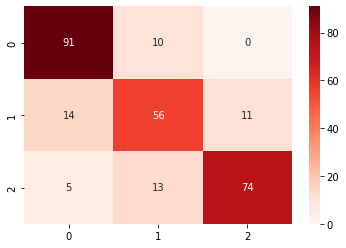


Classification Report: 

              precision    recall  f1-score   support

           A       0.83      0.90      0.86       101
           B       0.71      0.69      0.70        81
           C       0.87      0.80      0.84        92

    accuracy                           0.81       274
   macro avg       0.80      0.80      0.80       274
weighted avg       0.81      0.81      0.81       274



In [163]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.datasets  import load_breast_cancer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

# training the model for different k value

for k in range (2,7):
    kfold = KFold(n_splits=10, random_state = 10, shuffle = True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold)
    print('K = {0:<4}\tMean Accuracy = {1:.2%}\t\tStandard Deviation = {2:.2}'.format(k,scores.mean(), scores.std()))
    
    
    
    
## Training the model for n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X = X_train, y = y_train)
predicted = knn.predict(X_test)
expected = y_test


## Printing the mismatched prediction
print('\n Mismatched Prdiction: ')
wrong = [(p,e) for (p,e) in zip (predicted,expected) if p!=e]
print(wrong,"\n\n")



## Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(y_true = expected, y_pred = predicted)
confusion_df= pd.DataFrame(confusion, index = range(3), columns = range(3))
sns.heatmap(confusion_df, annot= True, cmap = 'Reds')
plt.show()


# Classification report 
from sklearn.metrics import classification_report
print('\nClassification Report: \n')
print(classification_report(expected, predicted))


 Mismatched Prdiction: 
[('A', 'B'), ('B', 'A'), ('B', 'C'), ('C', 'B'), ('A', 'B'), ('B', 'A'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('B', 'C'), ('A', 'B'), ('B', 'A'), ('B', 'C'), ('B', 'A'), ('B', 'A'), ('B', 'A'), ('C', 'B'), ('B', 'A'), ('C', 'B'), ('C', 'B'), ('B', 'C'), ('B', 'A'), ('B', 'A'), ('C', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'A'), ('B', 'A'), ('A', 'B'), ('A', 'B'), ('C', 'B'), ('A', 'B'), ('C', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'B'), ('B', 'A'), ('B', 'A'), ('B', 'C'), ('A', 'B'), ('C', 'B')] 




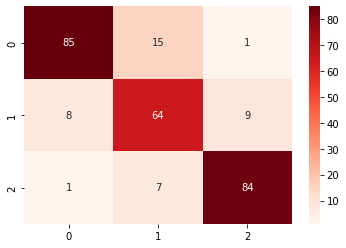


Classification Report: 

              precision    recall  f1-score   support

           A       0.90      0.84      0.87       101
           B       0.74      0.79      0.77        81
           C       0.89      0.91      0.90        92

    accuracy                           0.85       274
   macro avg       0.85      0.85      0.85       274
weighted avg       0.85      0.85      0.85       274



In [169]:
## Random forest 

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# define the model
model = RandomForestClassifier()


# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f' % (mean(n_scores)))

model.fit(X = X_train, y = y_train)
predicted = model.predict(X_test)
expected = y_test





print('\n Mismatched Prdiction: ')
wrong = [(p,e) for (p,e) in zip (predicted,expected) if p!=e]
print(wrong,"\n\n")



from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(y_true = expected, y_pred = predicted)
confusion_df= pd.DataFrame(confusion, index = range(3), columns = range(3))
sns.heatmap(confusion_df, annot= True, cmap = 'Reds')
plt.show()


# Classification report 
from sklearn.metrics import classification_report
print('\nClassification Report: \n')
print(classification_report(expected, predicted))